In [15]:
import pandas as pd
import os

In [16]:
d1 = pd.read_parquet('06120018\TCRF_ARCHIVE_06120018_20220523142237.parquet')
d1.columns

Index(['recording_time', 'aircraftSerNum-1', 'amscChBasHealthStatus-1b',
       'amscChBasHealthStatus-1a', 'amscChBasHealthStatus-2b',
       'amscHprsovDrivF-1a', 'amscHprsovDrivF-1b', 'amscHprsovDrivF-2b',
       'amscPrsovDrivF-1a', 'amscPrsovDrivF-1b', 'amscPrsovDrivF-2b',
       'basBleedLowPressF-1a', 'basBleedLowPressF-2b', 'basBleedLowTempF-1a',
       'basBleedLowTempF-2b', 'basBleedOverPressF-1a', 'basBleedOverPressF-2b',
       'basBleedOverTempF-1a', 'basBleedOverTempF-2b',
       'bleedAcsBleedConfigStatus-1b', 'bleedAcsBleedConfigStatus-2b',
       'bleedFavTmCmd-1a', 'bleedFavTmCmd-1b', 'bleedFavTmCmd-2a',
       'bleedFavTmCmd-2b', 'bleedFavTmFbk-1a', 'bleedFavTmFbk-1b',
       'bleedFavTmFbk-2b', 'bleedHprsovCmdStatus-1a',
       'bleedHprsovCmdStatus-1b', 'bleedHprsovCmdStatus-2a',
       'bleedHprsovCmdStatus-2b', 'bleedHprsovOpPosStatus-1a',
       'bleedHprsovOpPosStatus-1b', 'bleedHprsovOpPosStatus-2a',
       'bleedHprsovOpPosStatus-2b', 'bleedMonPress-1a', 'ble

In [17]:
lCol = ['recording_time','aircraftSerNum-1','amscChBasHealthStatus-1a','amscChBasHealthStatus-1b','amscChBasHealthStatus-2b','amscHprsovDrivF-1a','amscHprsovDrivF-1b','amscHprsovDrivF-2b','amscPrsovDrivF-1a','amscPrsovDrivF-1b','amscPrsovDrivF-2b','basBleedLowPressF-1a','basBleedLowPressF-2b','basBleedLowTempF-1a','basBleedLowTempF-2b','basBleedOverPressF-1a','basBleedOverPressF-2b','basBleedOverTempF-1a','basBleedOverTempF-2b','bleedFavTmCmd-1a','bleedFavTmCmd-1b','bleedFavTmCmd-2a','bleedFavTmCmd-2b','bleedFavTmFbk-1a','bleedFavTmFbk-1b','bleedFavTmFbk-2b','bleedHprsovCmdStatus-1a','bleedHprsovCmdStatus-1b','bleedHprsovCmdStatus-2a','bleedHprsovCmdStatus-2b','bleedHprsovOpPosStatus-1a','bleedHprsovOpPosStatus-1b','bleedHprsovOpPosStatus-2a','bleedHprsovOpPosStatus-2b','bleedMonPress-1a','bleedMonPress-1b','bleedMonPress-2a','bleedMonPress-2b','bleedOnStatus-1a','bleedOnStatus-1b','bleedOnStatus-2b','bleedOverpressCas-2a','bleedOverpressCas-2b','bleedPrecoolDiffPress-1a','bleedPrecoolDiffPress-1b','bleedPrecoolDiffPress-2a','bleedPrecoolDiffPress-2b','bleedPrsovClPosStatus-1a','bleedPrsovClPosStatus-2a','bleedPrsovFbk-1a','bleedPrsovFbk-1b','bleedPrsovFbk-2b','bleedPrsovOpPosStatus-1a','bleedPrsovOpPosStatus-1b','bleedPrsovOpPosStatus-2a','bleedPrsovOpPosStatus-2b','bleedPrsovTmCmd-1a','bleedPrsovTmCmd-1b','bleedPrsovTmCmd-2a','bleedPrsovTmCmd-2b','bleedSingleOperation-1a','bleedSingleOperation-2b','phaseOfFlight-1','sfyBasFaultWord1Bit13-1a','sfyBasFaultWord1Bit13-2b']

In [18]:
colunas_remover = d1.columns.difference(lCol)

In [19]:
caminho_da_pasta = "06120018"  

lista_arquivos = os.listdir(caminho_da_pasta)

In [20]:
f1 = d1.drop(columns=colunas_remover)

In [21]:
c = 0
#creating a df called 'ChBasHealthSt_1b' with the same columns as the original df
ChBasHealthSt_1b = pd.DataFrame(columns = f1.columns)

for i in lista_arquivos:
    c+=1
    file = pd.read_parquet(f'./06120018/{i}')
    file = file.drop(columns=colunas_remover)
    file = file.fillna(method='ffill')
    file.iloc[0] = file.iloc[0].fillna(0)
    
    values = file['amscChBasHealthStatus-1b'].unique()
    if len(values) == 1 and values[0] == 0:
        continue
    #get 1 row for each 100 rows
    file = file.iloc[::10, :]
    
    ChBasHealthSt_1b = pd.concat([ChBasHealthSt_1b, file])
    print(f'File {c} of {len(lista_arquivos)}; Size of the df: {ChBasHealthSt_1b.shape}')
    #exit loop if the df has more than 100000 rows
    if ChBasHealthSt_1b.shape[0] > 100000:
        break

File 135 of 2534; Size of the df: (8461, 65)
File 136 of 2534; Size of the df: (21066, 65)
File 137 of 2534; Size of the df: (34683, 65)
File 138 of 2534; Size of the df: (42140, 65)
File 139 of 2534; Size of the df: (51817, 65)
File 140 of 2534; Size of the df: (66910, 65)
File 141 of 2534; Size of the df: (81359, 65)
File 142 of 2534; Size of the df: (89474, 65)
File 143 of 2534; Size of the df: (98217, 65)
File 144 of 2534; Size of the df: (105990, 65)


In [22]:
#print top 100 rows of ChBasHealthSr_1b
ChBasHealthSt_1b.tail(10)

,recording_time,aircraftSerNum-1,amscChBasHealthStatus-1b,amscChBasHealthStatus-1a,amscChBasHealthStatus-2b,amscHprsovDrivF-1a,amscHprsovDrivF-1b,amscHprsovDrivF-2b,amscPrsovDrivF-1a,amscPrsovDrivF-1b,...,bleedPrsovOpPosStatus-2b,bleedPrsovTmCmd-1a,bleedPrsovTmCmd-1b,bleedPrsovTmCmd-2a,bleedPrsovTmCmd-2b,bleedSingleOperation-1a,bleedSingleOperation-2b,phaseOfFlight-1,sfyBasFaultWord1Bit13-1a,sfyBasFaultWord1Bit13-2b
77630,3881500,20018.0,2.0,2.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
77640,3882000,20018.0,2.0,2.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
77650,3882500,20018.0,2.0,2.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
77660,3883000,20018.0,2.0,2.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
77670,3883500,20018.0,2.0,2.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
77680,3884000,20018.0,2.0,2.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
77690,3884500,20018.0,2.0,2.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
77700,3885000,20018.0,2.0,2.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
77710,3885500,20018.0,2.0,2.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
77720,3886000,20018.0,2.0,2.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


recording_time               0.195982
amscChBasHealthStatus-1b     1.000000
amscChBasHealthStatus-1a     0.999679
amscPrsovDrivF-1a            0.999679
amscPrsovDrivF-1b            1.000000
bleedFavTmCmd-1b            -0.951482
bleedFavTmCmd-2a             0.177028
bleedFavTmCmd-2b             0.177028
bleedFavTmFbk-1a             0.245083
bleedFavTmFbk-1b            -0.952669
bleedFavTmFbk-2b             0.177602
bleedHprsovCmdStatus-1b     -0.779114
bleedHprsovCmdStatus-2a      0.116068
bleedHprsovCmdStatus-2b      0.116068
bleedHprsovOpPosStatus-1a   -0.779114
bleedHprsovOpPosStatus-1b   -0.779114
bleedMonPress-1a            -0.114339
bleedMonPress-1b            -0.114372
bleedOnStatus-1a            -0.943296
bleedOnStatus-1b            -0.943135
bleedPrecoolDiffPress-1a    -0.853688
bleedPrecoolDiffPress-1b    -0.853921
bleedPrecoolDiffPress-2a     0.218992
bleedPrecoolDiffPress-2b     0.219010
bleedPrsovClPosStatus-1a     0.926662
bleedPrsovFbk-1b            -0.954650
bleedPrsovFb

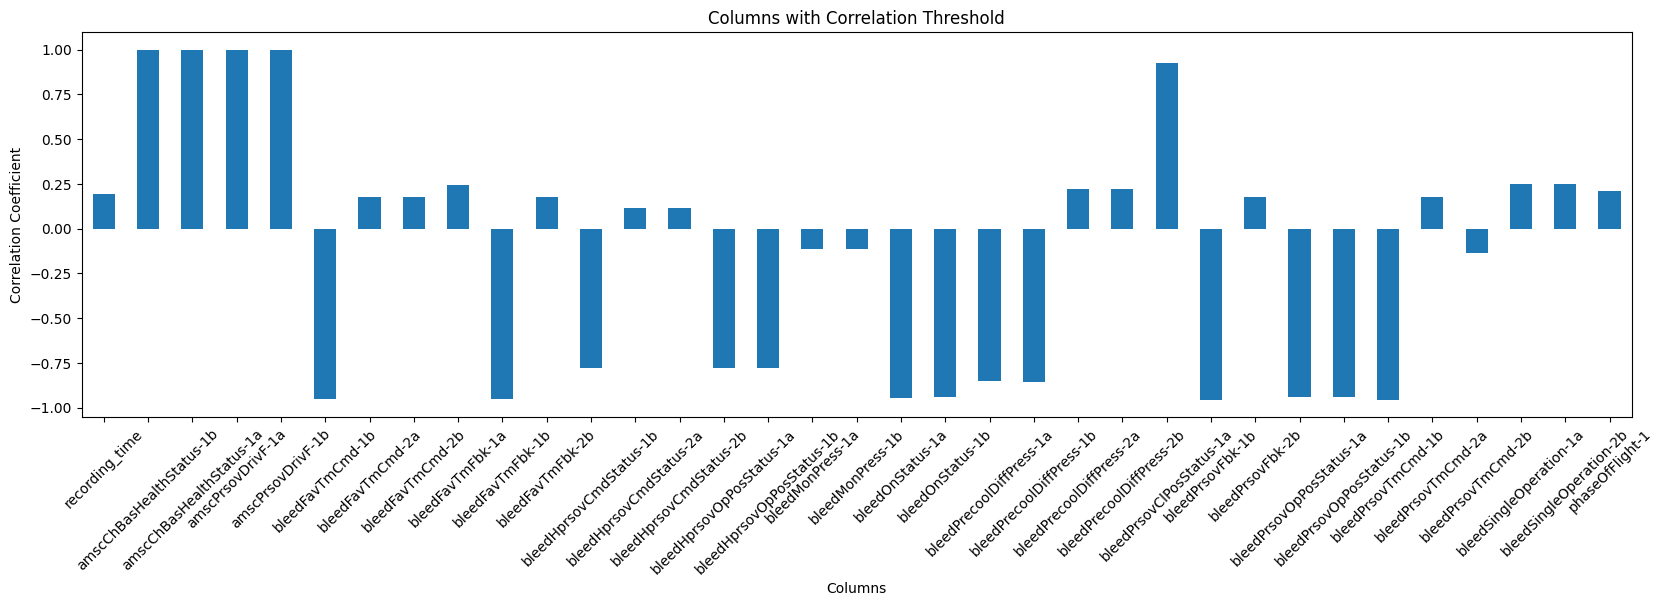

In [23]:
#find the correlation between the columns of the dataset

import numpy as np

# Calculate the correlation matrix
correlation_matrix = ChBasHealthSt_1b.corr()

# Select the correlation values for 'column1' with other columns
correlation_with_column1 = correlation_matrix['amscChBasHealthStatus-1b']

# Filter columns based on correlation threshold
correlation_threshold = 0.1
filtered_columns = correlation_with_column1[
    (correlation_with_column1 > correlation_threshold) |
    (correlation_with_column1 < -correlation_threshold)
]

# Print the filtered columns and their correlation values
print(filtered_columns)

import matplotlib.pyplot as plt

#increase the size of the plot
plt.rcParams['figure.figsize'] = [20, 5]
filtered_columns.plot(kind='bar')
plt.title('Columns with Correlation Threshold')
plt.ylabel('Correlation Coefficient')
plt.xlabel('Columns')
plt.xticks(rotation=45)
plt.show()